# Author: Anmol Khera

## Examining factors responsible for heart attacks prediction model

In [49]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [50]:
df= pd.read_excel('data_heart.xlsx')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [51]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


### EDA process

In [52]:
#Checking any null values present in the dataset
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [53]:
#No.of rows and columns in the dataset
df.shape

(303, 14)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [55]:
#All the columns in the dataset
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [56]:
#No. of unique values in every variable
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [57]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [58]:
#Statistical information of the dataset
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<AxesSubplot:>

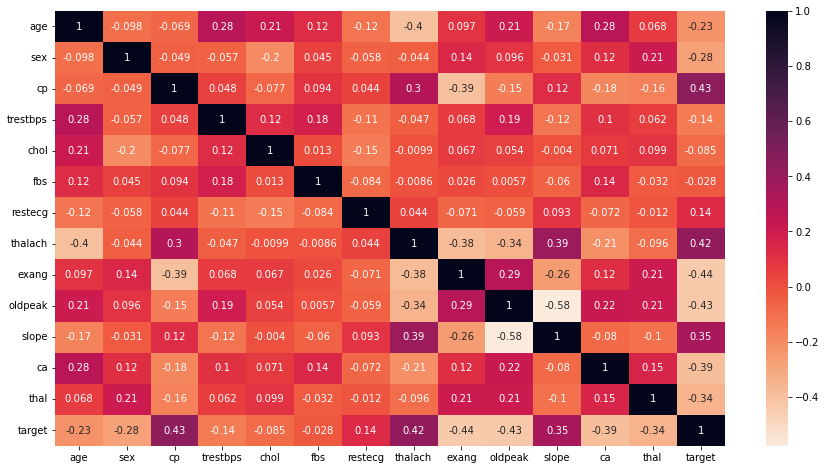

In [59]:
#Visualising the relationship between variables using heatmap
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True, cmap='rocket_r')

In [60]:
#Checking any duplicate values in the dataset
df.duplicated().sum()

1

In [61]:
df.drop_duplicates(keep=False, inplace=True)

In [62]:
df.shape

(301, 14)

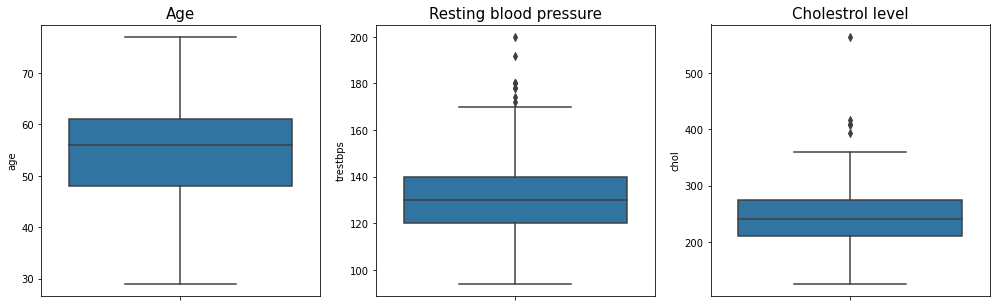

In [63]:
plt.figure(figsize=(17,5))
plt.subplot(1,3,1)
sns.boxplot(y= df['age'])
plt.title('Age', fontsize=15)

plt.subplot(1,3,2)
sns.boxplot(y= df['trestbps'])
plt.title('Resting blood pressure', fontsize=15)

plt.subplot(1,3,3)
sns.boxplot(y= df['chol'])
plt.title('Cholestrol level', fontsize=15)

plt.show()

#### From above boxplots, we can see there are some outliers detected in resting blood pressure levels and cholestrol level.

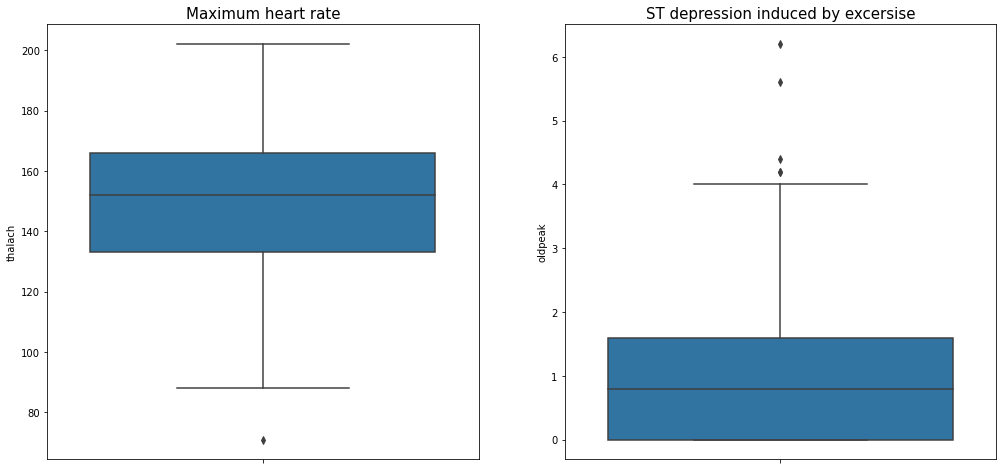

In [64]:
plt.figure(figsize=(17,8))
plt.subplot(1,2,1)
sns.boxplot(y= df['thalach'])
plt.title('Maximum heart rate', fontsize=15)

plt.subplot(1,2,2)
sns.boxplot(y= df['oldpeak'])
plt.title('ST depression induced by excersise', fontsize=15)

plt.show()

#### From above boxplots, both maximum heart rate and ST depression induced by excersise levels have outliers.

### Outlier Treatment

In [65]:
#Making outlier function for calculation of IQR(Inter Quartile Range)

In [66]:
def outlier(df, ft):
    Q3= np.percentile(df[ft], 75, interpolation='midpoint')
    Q1= np.percentile(df[ft], 25, interpolation='midpoint')
    
    IQR= Q3-Q1
    
    upper_limit= Q3 + (1.5*IQR)
    lower_limit= Q1 - (1.5*IQR)
    
    outliers=df.index[(df[ft] > upper_limit) | (df[ft] < lower_limit)]
    
    return outliers

In [67]:
index_list= []
for i in ['trestbps', 'chol', 'thalach', 'oldpeak']:
    index_list.extend(outlier(df, i))

In [68]:
index_list # these are all the outliers present in the dataset

[8,
 101,
 110,
 203,
 223,
 241,
 248,
 260,
 266,
 28,
 85,
 96,
 220,
 246,
 272,
 101,
 204,
 221,
 250,
 291]

In [69]:
#Now we need to create a function to remove them

In [70]:
def remove(df, outliers):
    outliers= sorted(set(outliers))
    df= df.drop(outliers)
    return df

In [71]:
#implementing function to remove the outliers
df1= remove(df, index_list)

In [72]:
df1.shape

(282, 14)

In [73]:
#Checking if outliers are removed or not by visualising box plots

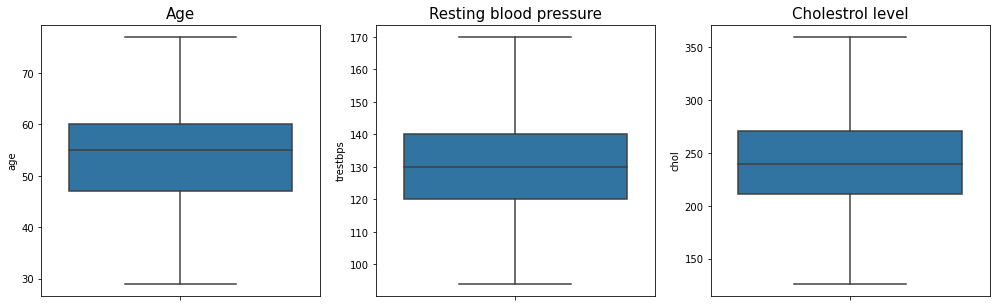

In [74]:
plt.figure(figsize=(17,5))
plt.subplot(1,3,1)
sns.boxplot(y= df1['age'])
plt.title('Age', fontsize=15)

plt.subplot(1,3,2)
sns.boxplot(y= df1['trestbps'])
plt.title('Resting blood pressure', fontsize=15)

plt.subplot(1,3,3)
sns.boxplot(y= df1['chol'])
plt.title('Cholestrol level', fontsize=15)

plt.show()

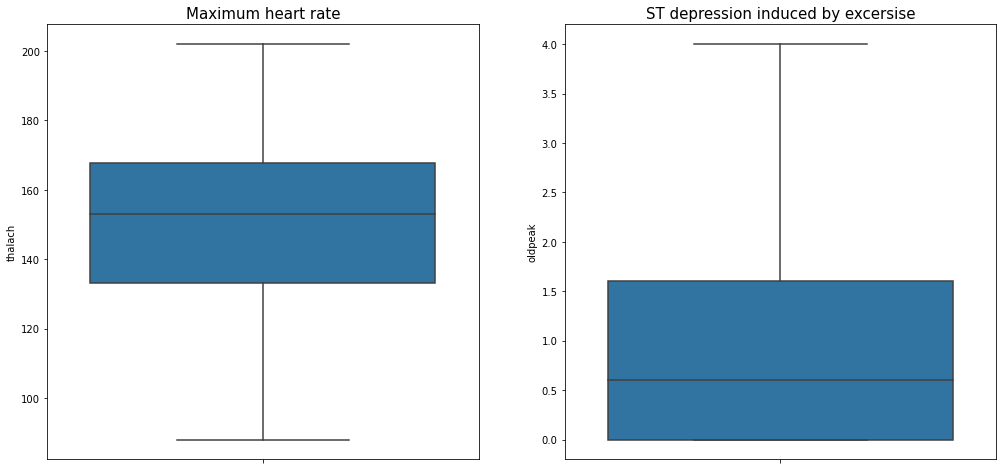

In [75]:
plt.figure(figsize=(17,8))
plt.subplot(1,2,1)
sns.boxplot(y= df1['thalach'])
plt.title('Maximum heart rate', fontsize=15)

plt.subplot(1,2,2)
sns.boxplot(y= df1['oldpeak'])
plt.title('ST depression induced by excersise', fontsize=15)

plt.show()

#### From the above we can clearly see that we have removed all the outliers from the dataset.

### Data Visualisation

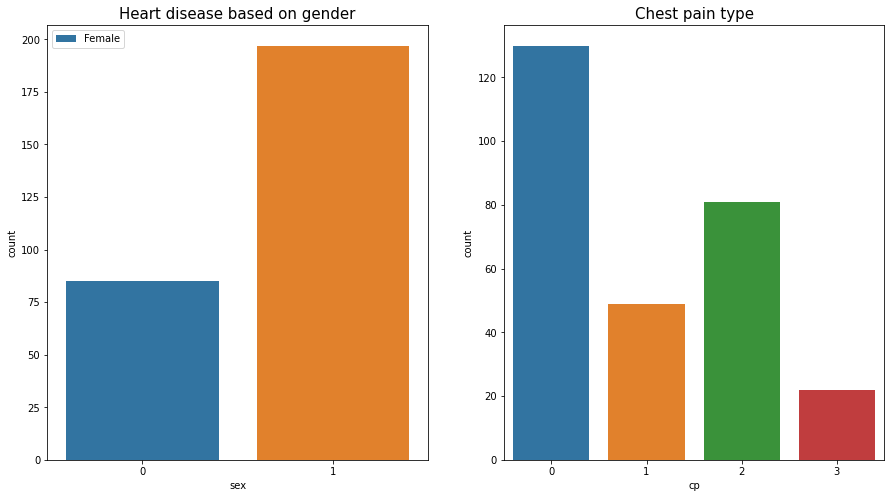

In [76]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.countplot(df1['sex'])
plt.legend(['Female', 'Male'], loc='upper left')
plt.title('Heart disease based on gender', fontsize=15)

plt.subplot(1,2,2)
sns.countplot(df1['cp'])
plt.title('Chest pain type', fontsize=15)

plt.show()

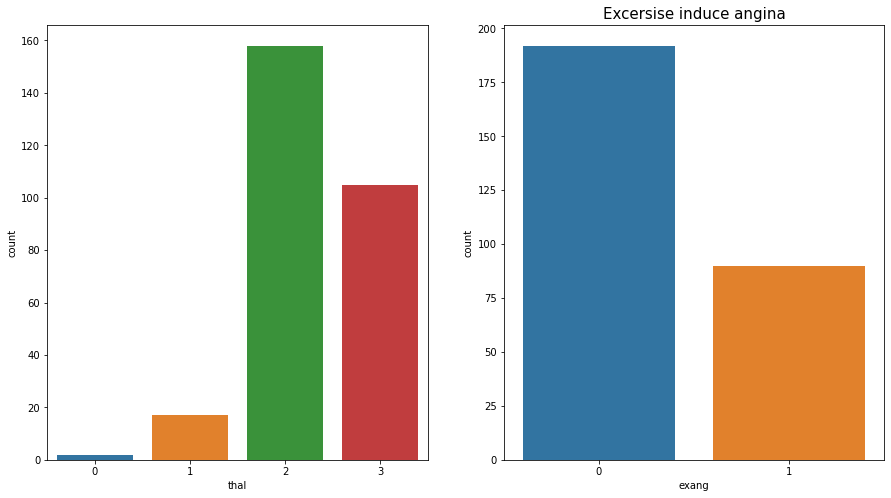

In [77]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.countplot(df1['thal'])

plt.subplot(1,2,2)
sns.countplot(df1['exang'])
plt.title('Excersise induce angina', fontsize=15)

plt.show()

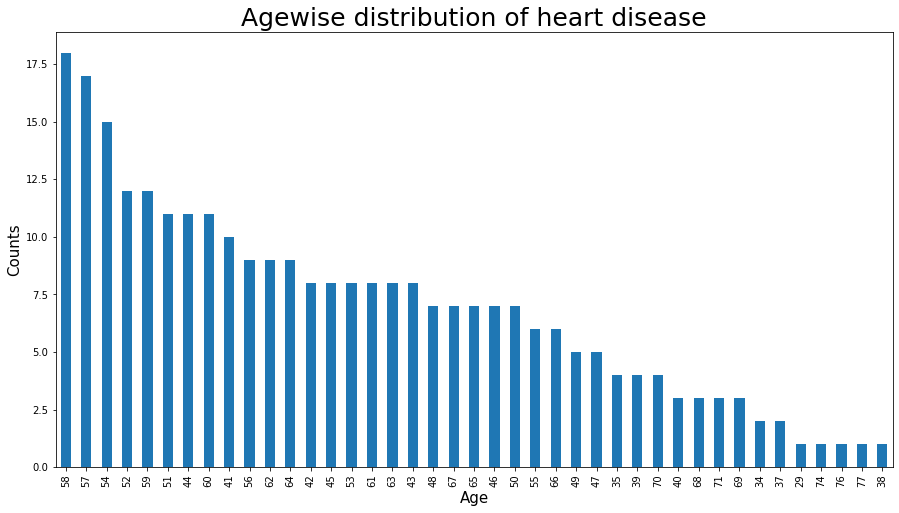

In [78]:
df1['age'].value_counts().plot(kind='bar', figsize=(15,8))
plt.xlabel('Age', fontsize='15')
plt.ylabel('Counts', fontsize='15')
plt.title('Agewise distribution of heart disease', fontsize=25)
plt.show()

#### From the above plot, most of the patients having heart deceased ages in 54, 57 and 58.

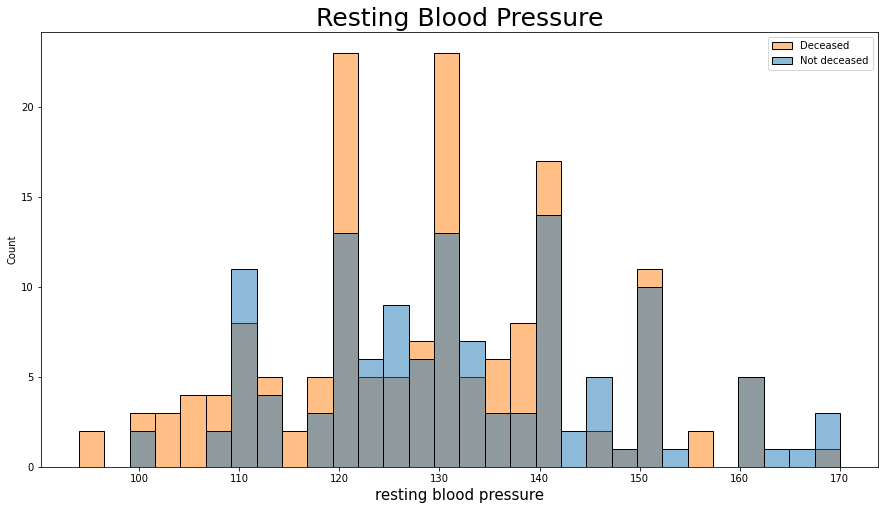

In [79]:
plt.figure(figsize=(15,8))
sns.histplot(df1, x=df1['trestbps'], bins=30, hue='target')
plt.title('Resting Blood Pressure', fontsize=25)
plt.xlabel('resting blood pressure', fontsize=15)
plt.legend(['Deceased', 'Not deceased'], loc= 'upper right')
plt.show()

#### From the above plot, most of the deceased patients having resting blood pressure of 120 to 130

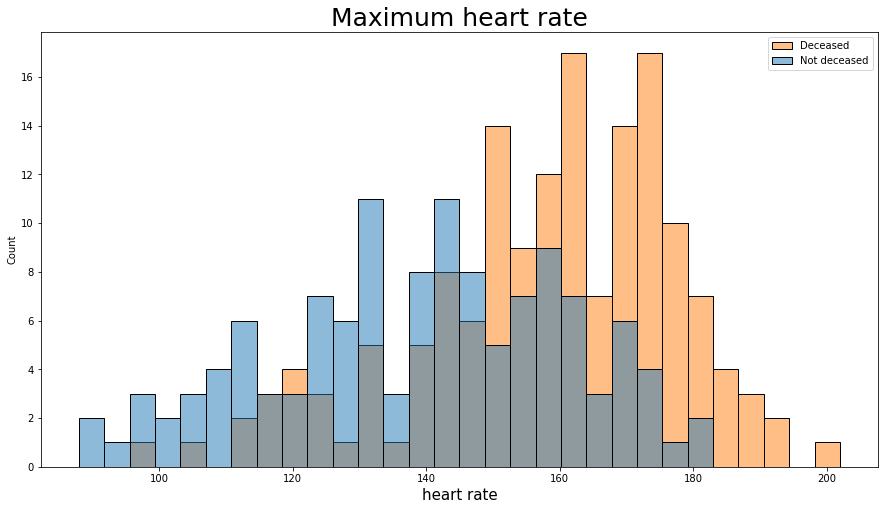

In [80]:
plt.figure(figsize=(15,8))
sns.histplot(df1 ,x=df1['thalach'], bins=30, hue=df1['target'])
plt.title('Maximum heart rate', fontsize=25)
plt.xlabel('heart rate', fontsize=15)
plt.legend(['Deceased', 'Not deceased'], loc='upper right')
plt.show()

#### From the above plot, heart rate of most of the deceased patients ranges from 150 to 200.

### Heart disease on the basis of Age

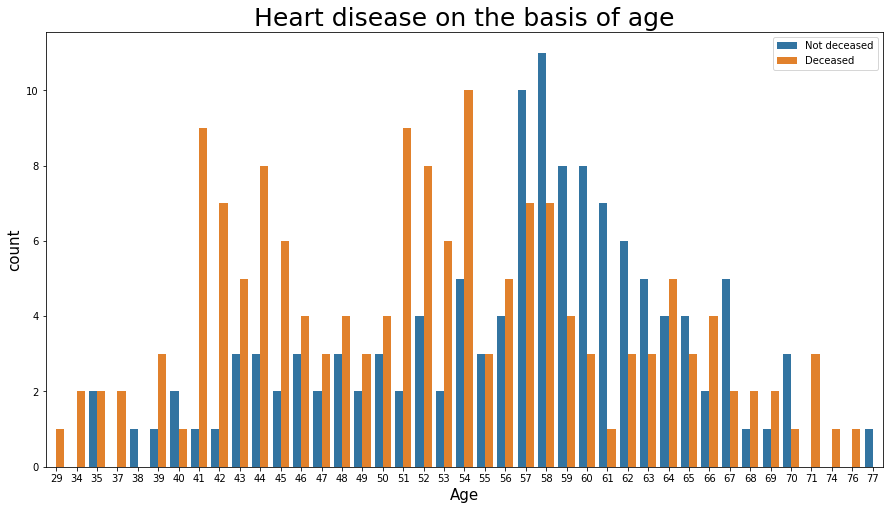

In [81]:
plt.figure(figsize=(15,8))
sns.countplot(df1['age'], hue=df1['target'])
plt.xlabel('Age', fontsize=15)
plt.ylabel('count', fontsize=15)
plt.legend(['Not deceased', 'Deceased'], loc='upper right')
plt.title('Heart disease on the basis of age', fontsize=25)
plt.show()

#### From the above plot, most of the deceased patients ranges between 41 to 54.

### Relationship of having heart disease with respect to cholestrol

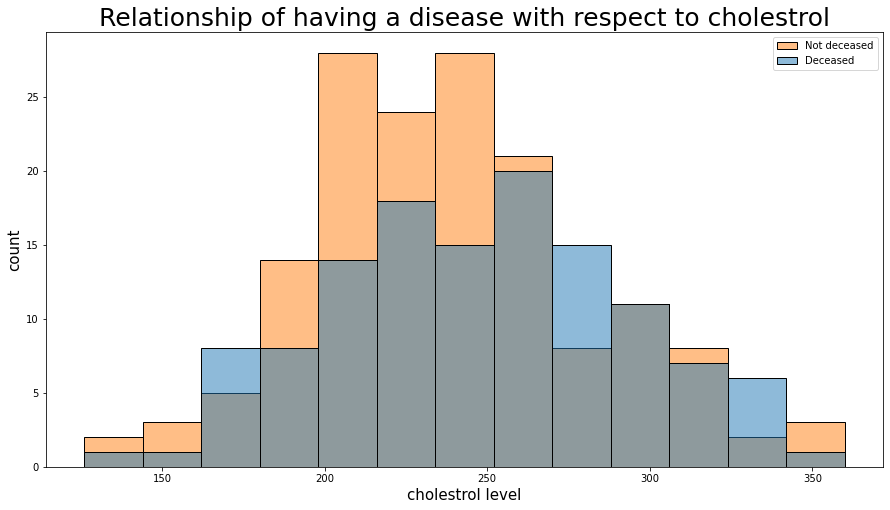

In [82]:
plt.figure(figsize=(15,8))
sns.histplot(df1, x=df1['chol'], hue='target')
plt.xlabel('cholestrol level', fontsize=15)
plt.ylabel('count', fontsize=15)
plt.legend(['Not deceased', 'Deceased'], loc='upper right')
plt.title('Relationship of having a disease with respect to cholestrol', fontsize=25)
plt.show()

#### From the above plot we can clearly see that most of the deceased patients having cholestrol levels ranges from more than 250 and 300, and, 340.

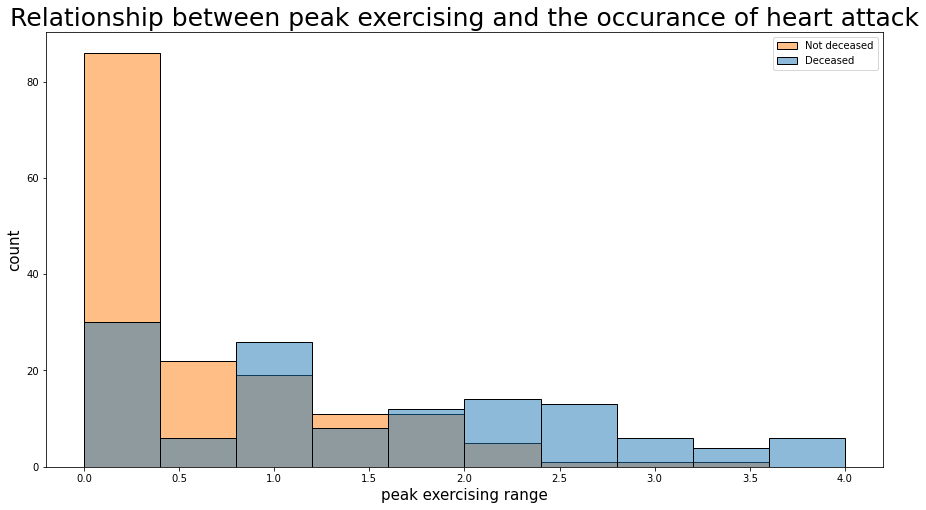

In [83]:
plt.figure(figsize=(15,8))
sns.histplot(df1, x=df1['oldpeak'], hue='target')
plt.xlabel('peak exercising range', fontsize=15)
plt.ylabel('count', fontsize=15)
plt.legend(['Not deceased', 'Deceased'], loc='upper right')
plt.title('Relationship between peak exercising and the occurance of heart attack', fontsize=25)
plt.show()

#### Here we can say that a heart attack can occur when peak excercising ranges more than 1.5 and above.

### Filtering data based on deceased and non deceased patients

In [84]:
deceased= df[df['target']== 1]
deceased.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [85]:
non_deceased= df[df['target']== 0]
non_deceased.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
165,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0
166,67,1,0,120,229,0,0,129,1,2.6,1,2,3,0
167,62,0,0,140,268,0,0,160,0,3.6,0,2,2,0
168,63,1,0,130,254,0,0,147,0,1.4,1,1,3,0
169,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0


In [86]:
print('Deceased dataset: ', deceased.shape)
print('Non Deceased dataset: ', non_deceased.shape)

Deceased dataset:  (163, 14)
Non Deceased dataset:  (138, 14)


### Data Preparation for Modelling

In [87]:
#Separating output variable from the dataset

In [88]:
x= df1.drop('target', axis=1)
y= df1['target']

In [89]:
#Importing necessary libraries for model prep
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state= 1234)

In [90]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

In [91]:
logistic_m= LogisticRegression(random_state= 0)
logistic_m.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [92]:
y_pred= logistic_m.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82        21
           1       0.91      0.86      0.89        36

    accuracy                           0.86        57
   macro avg       0.85      0.86      0.85        57
weighted avg       0.86      0.86      0.86        57



### Accuracy of our model is 86%